<a href="https://colab.research.google.com/github/showman-sharma/Melanoma_Detection_CNN/blob/main/CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from collections import Counter

In [2]:

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [16]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using c
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,    # Specify the batch size for training
    image_size=(img_height, img_width),    # Specify the target image size
    validation_split=0.2,    # Specify the validation split (optional)
    seed=123,    # Specify the random seed (optional)
    subset="training"    # Specify if it's the training subset (optional)
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,    # Specify the batch size for training
    image_size=(img_height, img_width),    # Specify the target image size
    validation_split=0.2,    # Specify the validation split (optional)
    seed=123,    # Specify the random seed (optional)
    subset="validation"    # Specify if it's the training subset (optional)
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [18]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [19]:
num_classes = len(class_names)

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

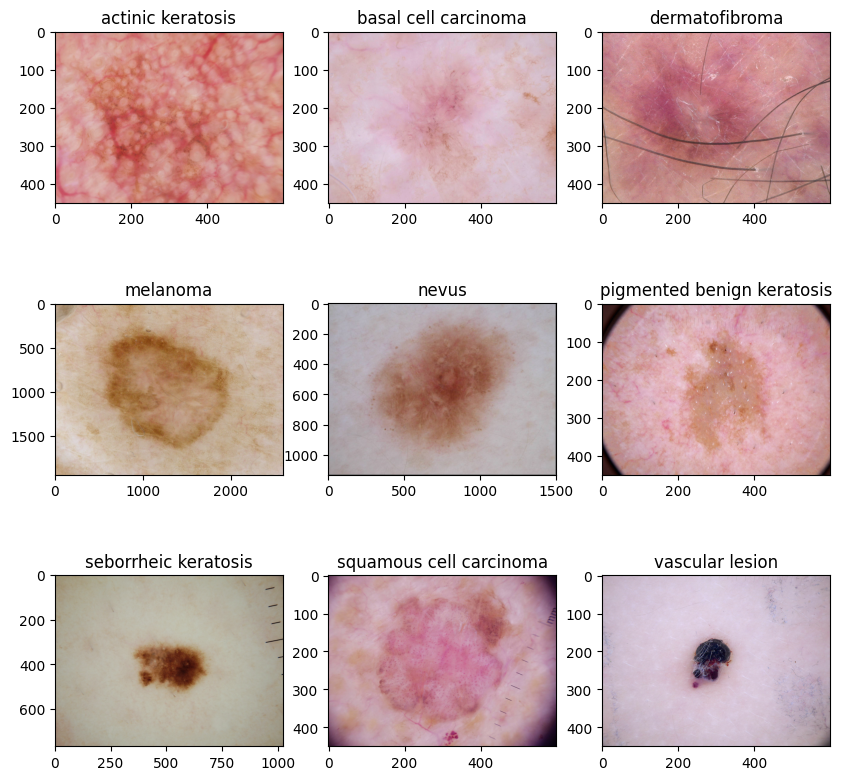

In [20]:
### visualize one instance of all the nine classes present in the dataset
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
  plt.subplot(3,3,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[0]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

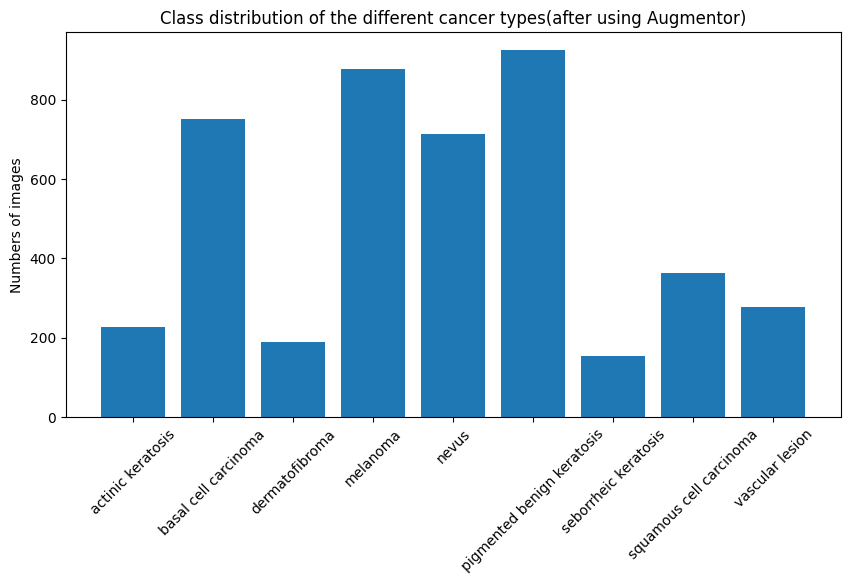

In [27]:
#plot the images to check if all the cancer types are equally distributed
plt.figure(figsize=(10,5))
x=[]
y=[]
for i in range(len(class_names)):
  x.append(class_names[i])
  y.append(len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))) + len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

plt.bar(x,y)
plt.ylabel('Numbers of images')
plt.title('Class distribution of the different cancer types(after using Augmentor)')
plt.xticks(rotation=45)
plt.show()

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.10))

model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.10))


model.add(Flatten())
model.add(Dense(num_classes,activation='softmax',kernel_regularizer=keras.regularizers.l2(0.0001)))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [75]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [76]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_49 (Bat  (None, 180, 180, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 batch_normalization_50 (Bat  (None, 180, 180, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)     

### Train the model

In [77]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 8s 73ms/step - loss: 10.8459 - accuracy: 0.3560 - val_loss: 6.5240 - val_accuracy: 0.0403
Epoch 2/30
56/56 [==============================] - 4s 69ms/step - loss: 5.7959 - accuracy: 0.5234 - val_loss: 10.4118 - val_accuracy: 0.0582
Epoch 3/30
56/56 [==============================] - 4s 73ms/step - loss: 4.8615 - accuracy: 0.6211 - val_loss: 9.2795 - val_accuracy: 0.0425
Epoch 4/30
56/56 [==============================] - 4s 70ms/step - loss: 3.4513 - accuracy: 0.6719 - val_loss: 18.2941 - val_accuracy: 0.0537
Epoch 5/30
56/56 [==============================] - 4s 73ms/step - loss: 3.1619 - accuracy: 0.7176 - val_loss: 15.2821 - val_accuracy: 0.0604
Epoch 6/30
56/56 [==============================] - 4s 71ms/step - loss: 2.4680 - accuracy: 0.7723 - val_loss: 16.1481 - val_accuracy: 0.0537
Epoch 7/30
56/56 [==============================] - 4s 71ms/step - loss: 1.9725 - accuracy: 0.8142 - val_loss: 12.4386 - val_accuracy: 0.1409
Epoch 8

### Visualizing training results

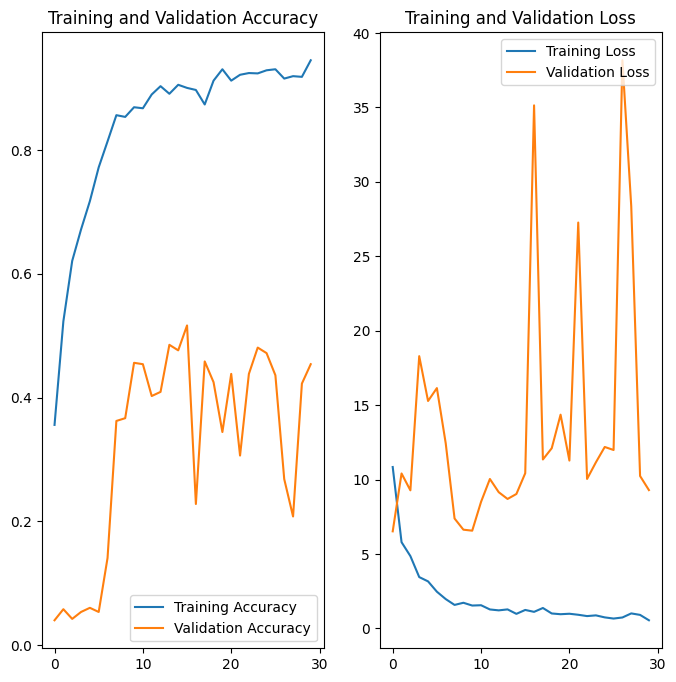

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:
1. As the number of epochs increase, the training accuracy increases whereas the validation accuracy increases to a max value of 45-50% and then stalls.
2. As the number of epochs increase, the training loss decreases whereas the validation loss fluctuates heavily above the value 10.
3. Overall, the validation accuracy was 45% for the model.
4. The high training accuracy and low validation accuracy tells us that <mark>**the model is Overfitting and needs tuning**</mark>.

### Hypothesis: 
Here, the overfitting might be happening because the training data size is too small and does not contain enough data samples to accurately represent all possible input data values.

### Experiment
So, let's try to perform some data augmentation strategy to come up with a bigger dataset, and see if overfitting is reduced.
We will keep the model architecture and validation dataset the same, to make sure everything else is constant for the experiment.

In [63]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Define a rotation and flip function
def random_rotation_and_flip(image, label):
    # Generate a random rotation angle (0, 1, 2, or 3) for 90-degree rotations
    rotation_angle = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    # Apply rotation to the image
    image = tf.image.rot90(image, rotation_angle)
    # Randomly apply a horizontal flip
    image = tf.image.random_flip_left_right(image)
    return image, label

# Create the new dataset train_ds_2 with random rotations and flips
train_ds_2 = train_ds.map(random_rotation_and_flip)
# Concatenate train_ds_2 and train_ds
train_ds_rot_flip = train_ds.concatenate(train_ds_2)

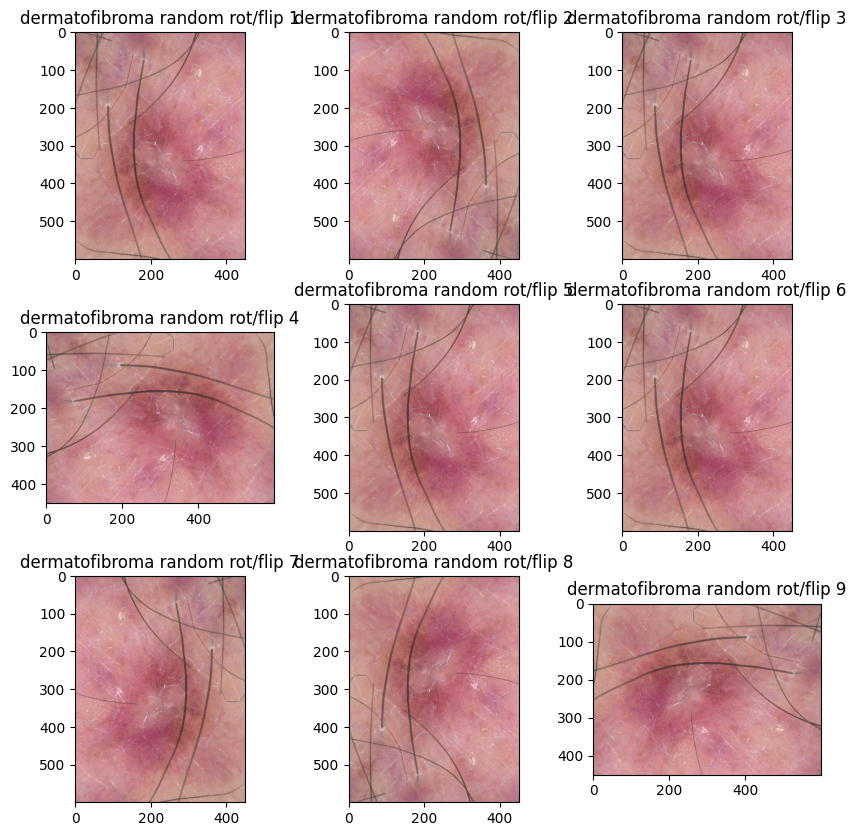

In [100]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[2]+'/*.jpg'))[0]))
  image, _ = random_rotation_and_flip(image, None)
  plt.title(class_names[2]+' random rot/flip '+str(i+1))
  plt.imshow(image)

### Todo:
### Create the model, compile and train the model


In [79]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model2 = Sequential()
model2.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model2.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1), padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))


model2.add(Flatten())
model2.add(Dense(num_classes,activation='softmax',kernel_regularizer=keras.regularizers.l2(0.0001)))

### Compiling the model

In [80]:
## Your code goes here
model2.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [81]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history2 = model2.fit(
  train_ds_rot_flip,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
112/112 [==============================] - 14s 73ms/step - loss: 8.9970 - accuracy: 0.3817 - val_loss: 18.3094 - val_accuracy: 0.0537
Epoch 2/30
112/112 [==============================] - 8s 71ms/step - loss: 4.5130 - accuracy: 0.4914 - val_loss: 13.8019 - val_accuracy: 0.0537
Epoch 3/30
112/112 [==============================] - 8s 72ms/step - loss: 3.9473 - accuracy: 0.5299 - val_loss: 7.4957 - val_accuracy: 0.0761
Epoch 4/30
112/112 [==============================] - 8s 71ms/step - loss: 2.9298 - accuracy: 0.5790 - val_loss: 8.9370 - val_accuracy: 0.1499
Epoch 5/30
112/112 [==============================] - 8s 74ms/step - loss: 2.0230 - accuracy: 0.6443 - val_loss: 3.7760 - val_accuracy: 0.4430
Epoch 6/30
112/112 [==============================] - 8s 70ms/step - loss: 1.8746 - accuracy: 0.6571 - val_loss: 4.6654 - val_accuracy: 0.4944
Epoch 7/30
112/112 [==============================] - 8s 71ms/step - loss: 1.8220 - accuracy: 0.6716 - val_loss: 5.2864 - val_accuracy: 0.4

### Training the model

### Visualizing the results

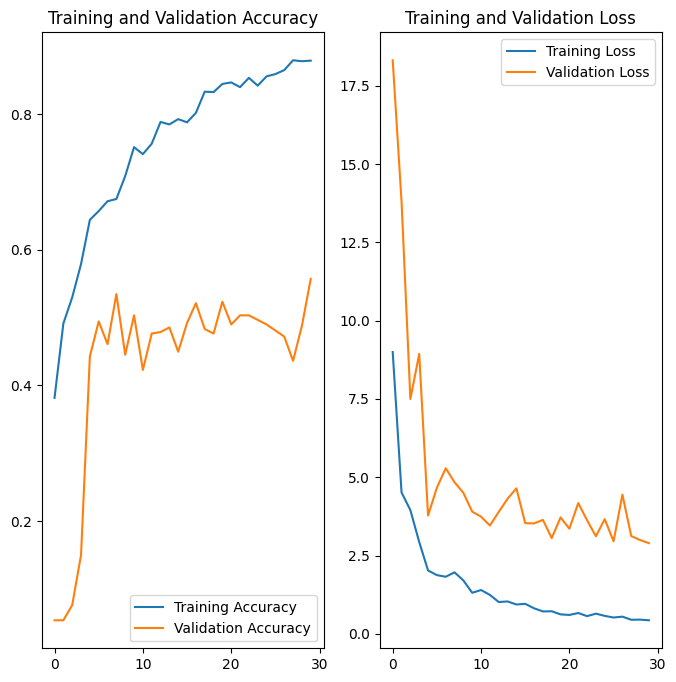

In [82]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations
1. The training accuracy slightly decreased compared to the previous model, from ~95% to ~88%
2. The validation accuracy increased well from ~45% to ~55%
3. The validation loss is much lower than the previous model and has steadily decreased with epochs, contrasting to the fluctuant behaviour of previous model.
4. The gap between training and validation accuracy has reduced from ~55% to ~35%, which is still pretty high

#### Conclusions
1. Less data has been a reason for overfitting
2. The new model has well reduced overfitting and increase in accuracy by 10%
3. There is still lot of overfitting to take care of

#### Hypothesis
The data might be heavily imbalanced, and coreecting for the imbalance could redce overfitting and improve performance.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

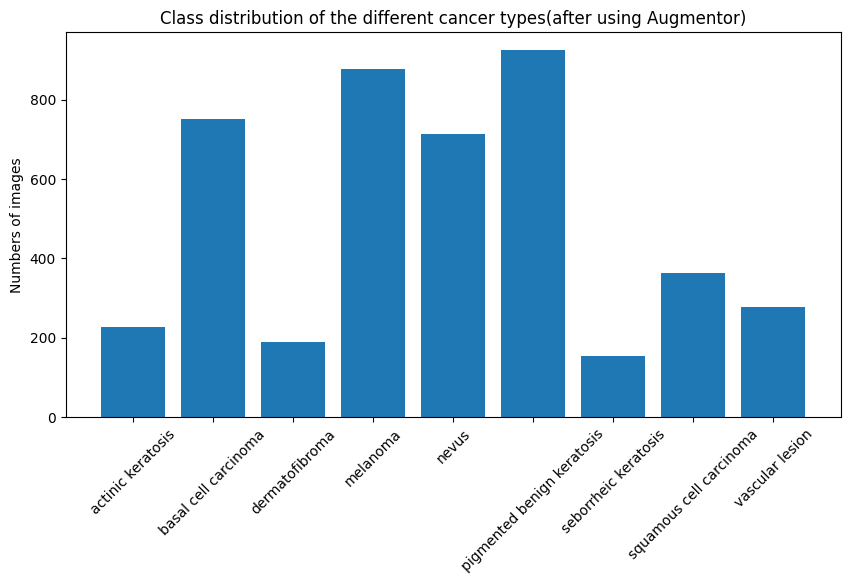

In [84]:
# let's look at the class size distribution
#plot the images to check if all the cancer types are equally distributed
plt.figure(figsize=(10,5))
x=[]
y=[]
for i in range(len(class_names)):
  x.append(class_names[i])
  y.append(len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))) + len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

plt.bar(x,y)
plt.ylabel('Numbers of images')
plt.title('Class distribution of the different cancer types(before using Augmentor)')
plt.xticks(rotation=45)
plt.show()


## OBSERVATIONS
1. There is heavy imbalance in class size distribution.
2. The classes *seborrheic keratosis* and *dermatofibroma*, have very small number of samples (<200)
3. The classes *pigmented benign keratosis* and *melanomal*,  dominate the data in terms proportionate number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [85]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [86]:
path_to_training_dataset= '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E4C42BEE0>: 100%|██████████| 500/500 [00:26<00:00, 18.69 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E54199F00>: 100%|██████████| 500/500 [00:28<00:00, 17.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0EF1D4EC50>: 100%|██████████| 500/500 [00:32<00:00, 15.51 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7F0EF0363B80>: 100%|██████████| 500/500 [01:50<00:00,  4.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F0EF02D2620>: 100%|██████████| 500/500 [01:46<00:00,  4.71 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0E5072B6D0>: 100%|██████████| 500/500 [00:26<00:00, 18.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0EF1D4FB50>: 100%|██████████| 500/500 [00:52<00:00,  9.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E541F5B40>: 100%|██████████| 500/500 [00:22<00:00, 22.30 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E4C42BD30>: 100%|██████████| 500/500 [00:24<00:00, 20.81 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [88]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

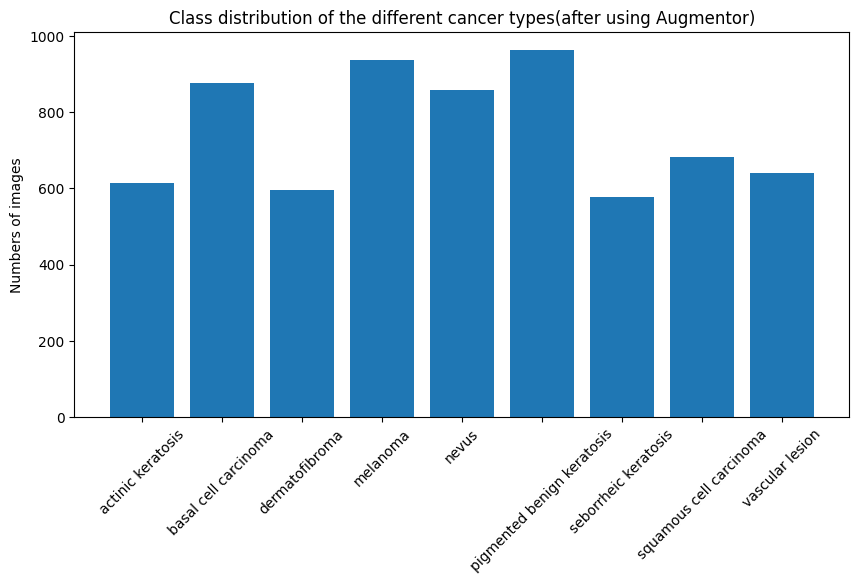

In [104]:
plt.figure(figsize=(10,5))
x=[]
y=[]
for i in range(len(class_names)):
  x.append(class_names[i])
  y.append(len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))) + len(list(data_dir_train.glob(class_names[i]+'/output/*.jpg'))))

plt.bar(x,y)
plt.ylabel('Numbers of images')
plt.title('Class distribution of the different cancer types(after using Augmentor)')
plt.xticks(rotation=45)
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [89]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [107]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [108]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [109]:
model3 = Sequential()
model3.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model3.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1), padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu', padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))


model3.add(Flatten())
model3.add(Dense(num_classes,activation='softmax',kernel_regularizer=keras.regularizers.l2(0.0001)))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [110]:
## Your code goes here
model3.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [111]:
epochs = 20
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 39s 205ms/step - loss: 8.2503 - accuracy: 0.4049 - val_loss: 10.2784 - val_accuracy: 0.1084
Epoch 2/20
169/169 [==============================] - 34s 195ms/step - loss: 3.1632 - accuracy: 0.5564 - val_loss: 6.4974 - val_accuracy: 0.2049
Epoch 3/20
169/169 [==============================] - 35s 204ms/step - loss: 1.9833 - accuracy: 0.6738 - val_loss: 2.4507 - val_accuracy: 0.5278
Epoch 4/20
169/169 [==============================] - 34s 196ms/step - loss: 1.7059 - accuracy: 0.7187 - val_loss: 1.9401 - val_accuracy: 0.6488
Epoch 5/20
169/169 [==============================] - 36s 205ms/step - loss: 1.1799 - accuracy: 0.7862 - val_loss: 2.4167 - val_accuracy: 0.6540
Epoch 6/20
169/169 [==============================] - 34s 195ms/step - loss: 1.0046 - accuracy: 0.8188 - val_loss: 3.2244 - val_accuracy: 0.6154
Epoch 7/20
169/169 [==============================] - 35s 204ms/step - loss: 0.9454 - accuracy: 0.8433 - val_loss: 4.2757 - val_a

#### **Todo:**  Visualize the model results

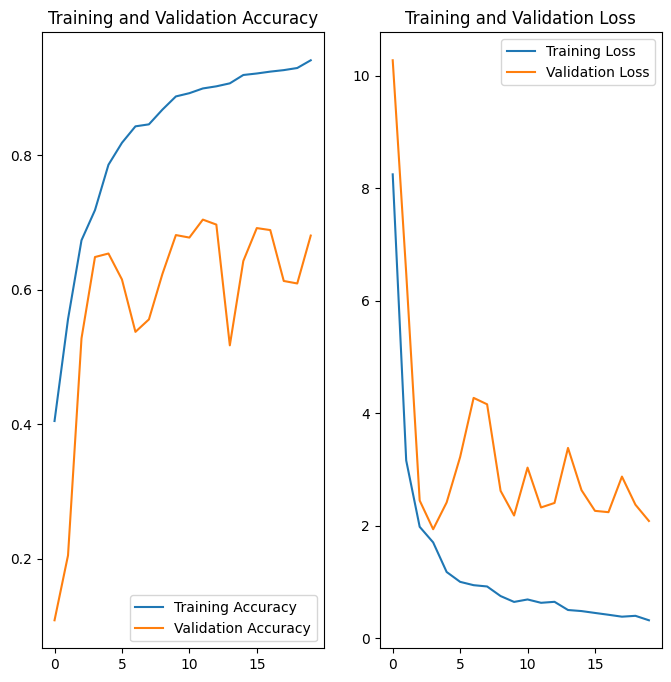

In [113]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Observations
1. The training accuracy increased compared to the previous model, from ~88% to ~95%
2. The validation accuracy increased well from ~55% to ~68%
4. The gap between training and validation accuracy has reduced from ~35% to ~27%
5. Though the training accuracy steadily increased with epochs, the envelope of validation accuracy got stabilized to about 65% from the 5th epoch
6. Though the training loss steadily decreased with epochs, the lower envelope of validation loss got stabilized from the 5th epoch

#### Conclusions
1. Data imbalance has been a reason for overfitting
2. Class rebalancing has well reduced overfitting and increased validation accuracy by 15%
3. We have achieved a decent and acceptable model.
